Step 1: Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Step 2: Reading Dataset

In [2]:
df = pd.read_csv("wineQT.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Step 3: Analyzing the Data

In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

Step 4 : Checking Missing Values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Step 5 : Checking for the duplicate values

In [8]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

Step 6: Univariate Analysis for (analyzing the distribution, central tendency, and spread of data effectively)

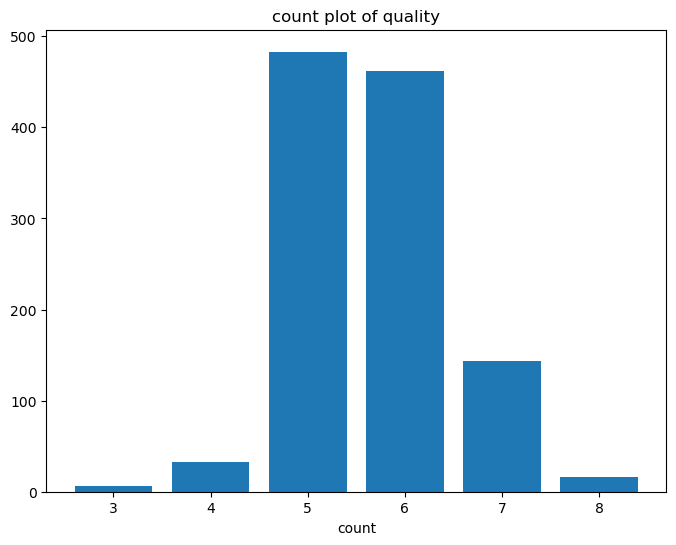

In [9]:
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(quality_counts.index, quality_counts)
plt.title('count plot of quality')
plt.xlabel('Quality')
plt.xlabel('count')
plt.show()

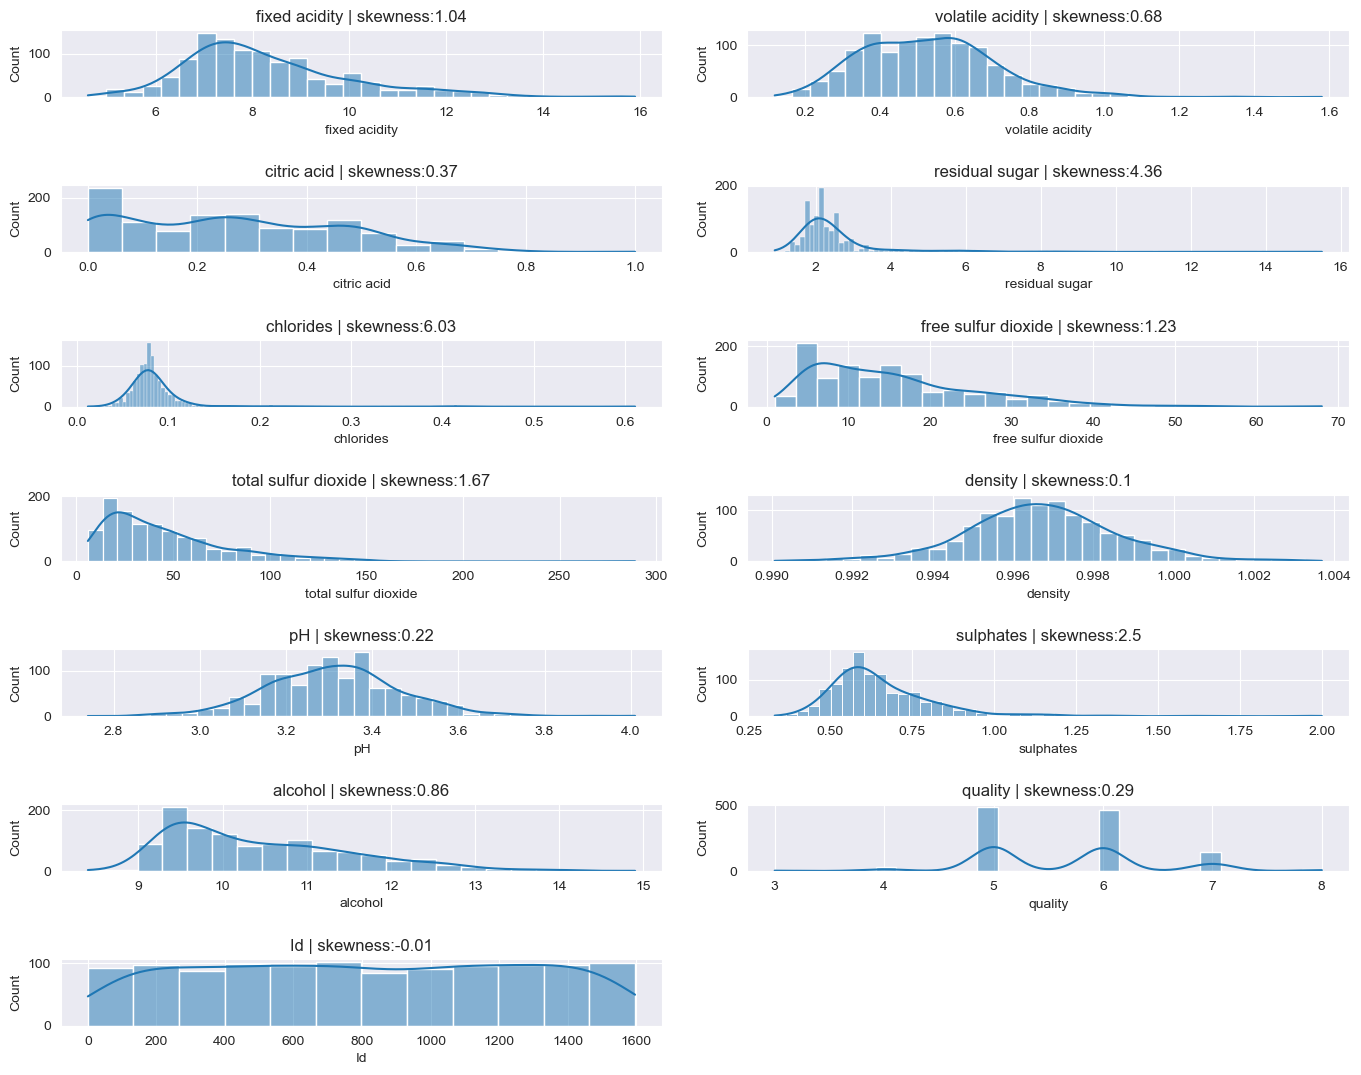

In [10]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, 20))
for idx,feature in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),2,idx)
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} | skewness:{round(df[feature].skew(),2)}")
    
plt.tight_layout(pad = 2.0)
plt.show()

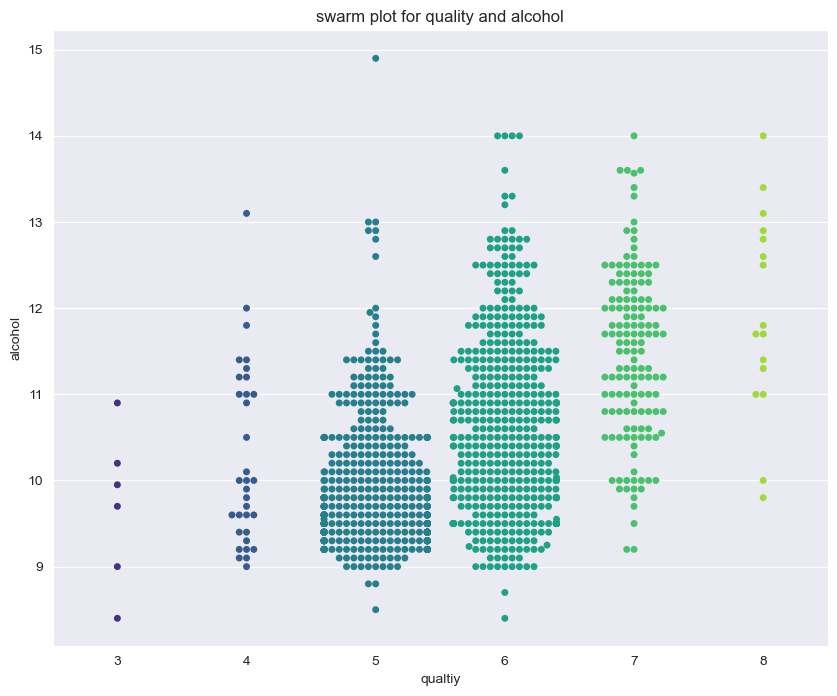

In [11]:
plt.figure(figsize = (10,8))
sns.swarmplot(x = "quality", y = "alcohol", data = df, palette="viridis")
plt.title("swarm plot for quality and alcohol")
plt.xlabel('qualtiy')
plt.ylabel('alcohol')
plt.show()

<Figure size 1000x600 with 0 Axes>

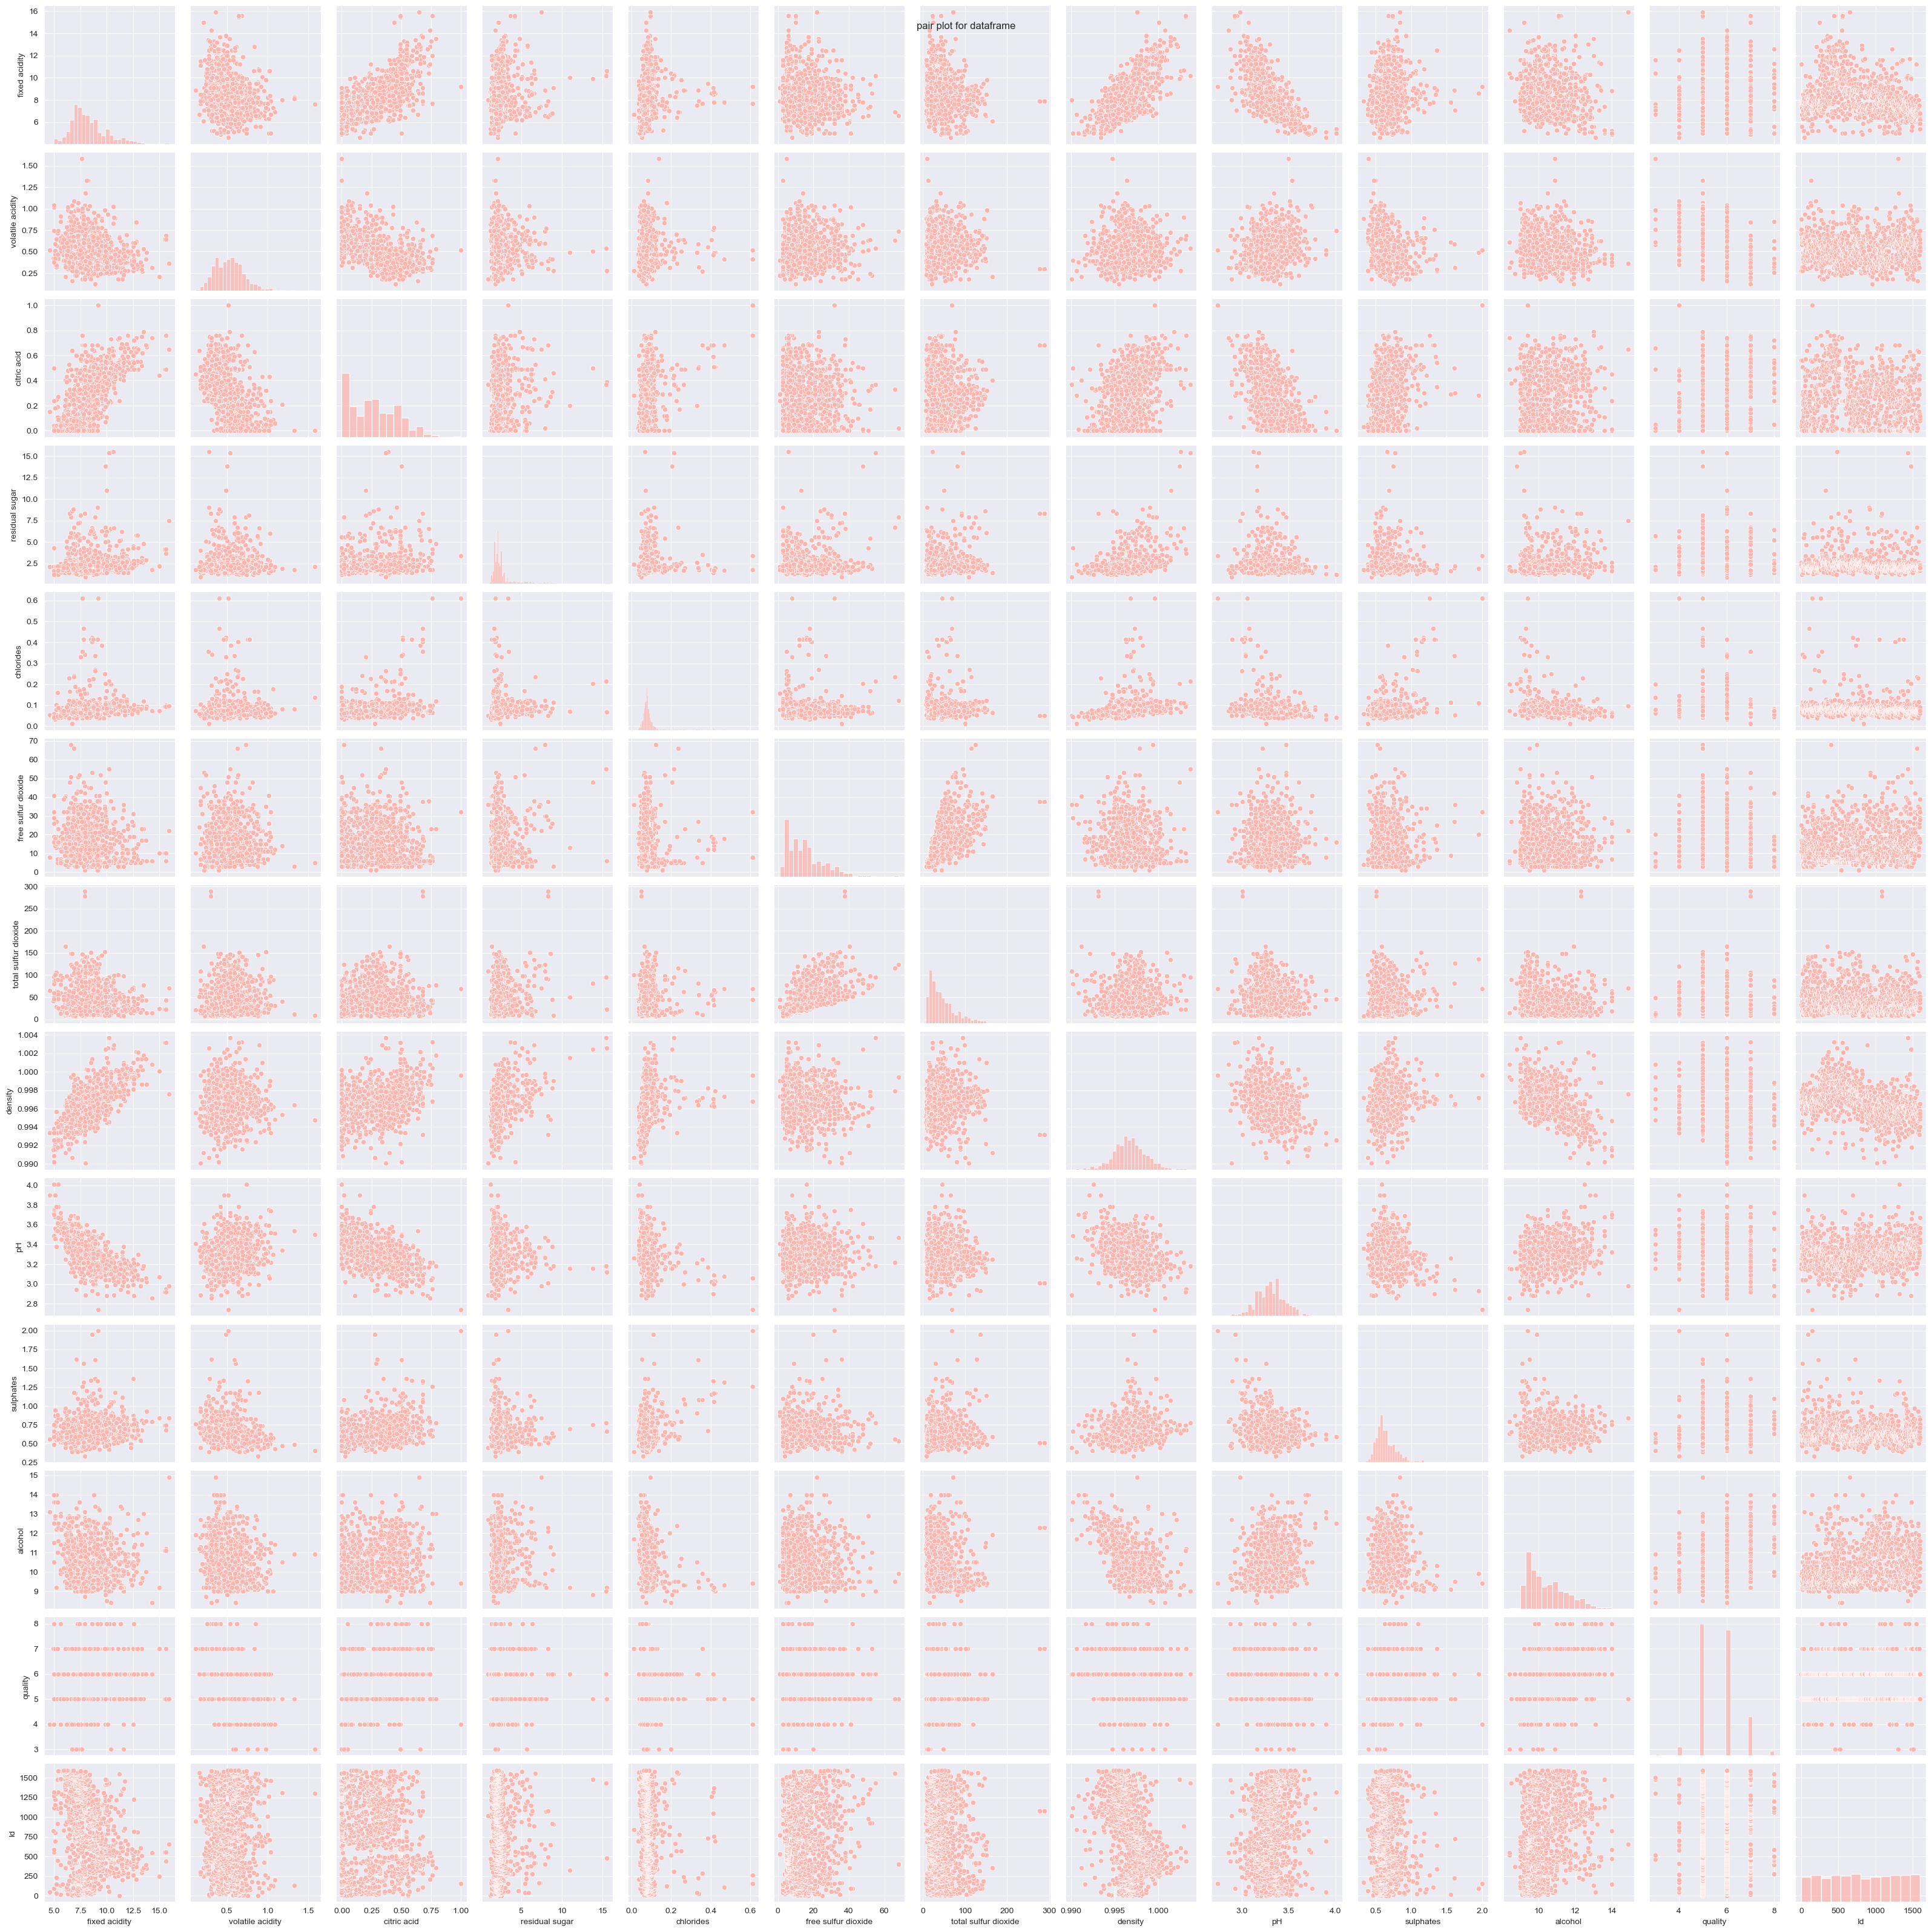

In [12]:
sns.set_palette("Pastel1")
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.suptitle("pair plot for dataframe")
plt.show()

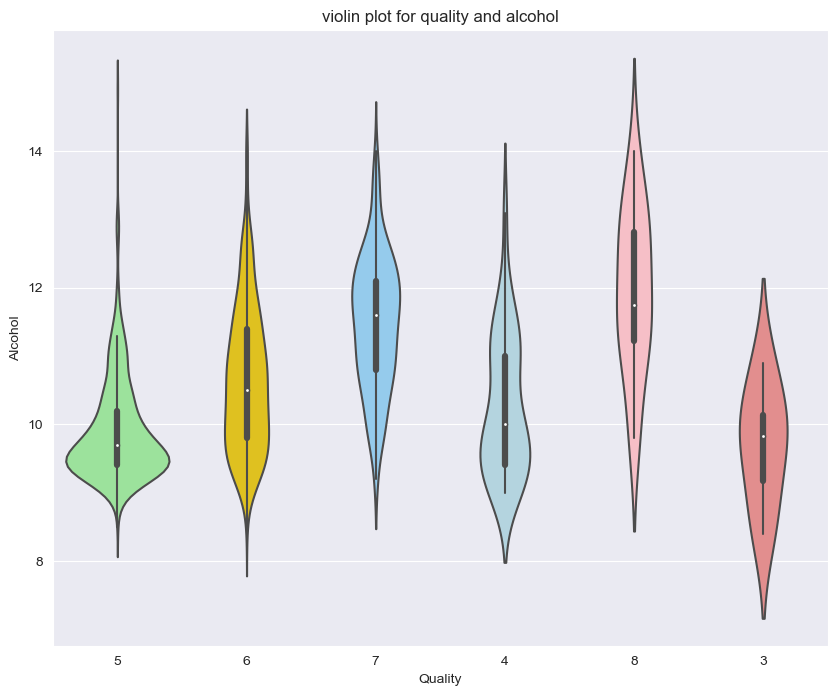

In [14]:
df['quality'] = df['quality'].astype(str)
plt.figure(figsize=(10,8))
sns.violinplot(x="quality", y="alcohol", data=df,palette = 
               {'3':'lightcoral', '4':'lightblue', '5':'lightgreen', '6'
                :'gold', '7':'lightskyblue', '8':'lightpink'}, alpha = 0.7)
plt.title("violin plot for quality and alcohol")
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

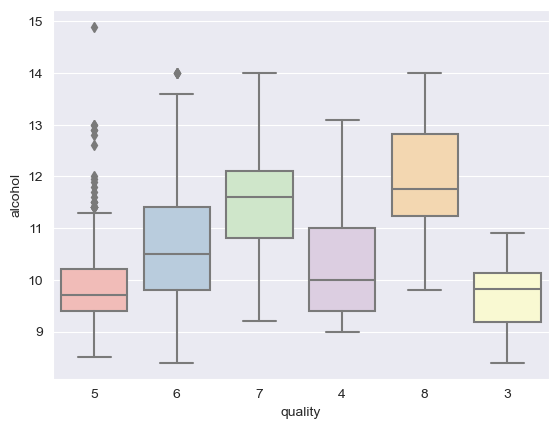

In [15]:
sns.boxplot(x='quality', y='alcohol', data=df)

Step 7: Multivariate Analysis for (understanding complex relationships and patterns among multiple variables effectively)


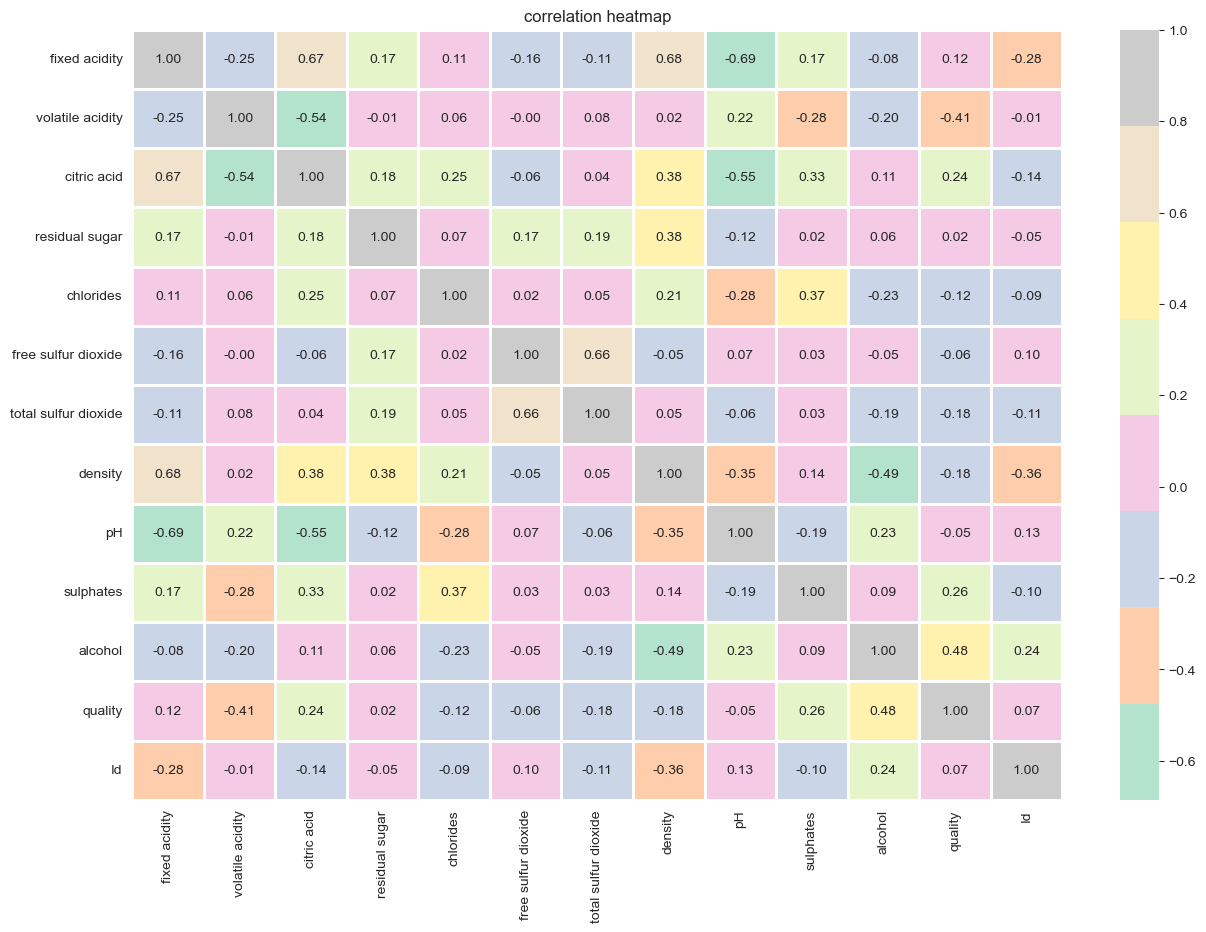

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('correlation heatmap')
plt.show()